In [6]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Se utiliza un experimento donde se tiene una moneda cargada. La hipotesis nula es que la moneda es justa y a partir de esto se obtiene el p-value

In [27]:
n=150.0
num=100

NN=logspace(1,3,num)

meanP=zeros(num)
stdP=zeros(num)
minP=zeros(num)
maxP=zeros(num)
medianP=zeros(num)


def experimento():
    resultado=random.binomial(n,0.60)
    pValue=2.0*norm.cdf(-abs(resultado-0.5*n)/sqrt(n/4.0))
    return pValue

for N,i in zip(NN,range(num)):
    pvalues=zeros(int(N))
    for j in range(int(N)):
        pvalues[j]=experimento()
    meanP[i]=mean(pvalues)
    stdP[i]=std(pvalues)
    minP[i]=min(pvalues)
    maxP[i]=max(pvalues)
    medianP[i]=median(pvalues)

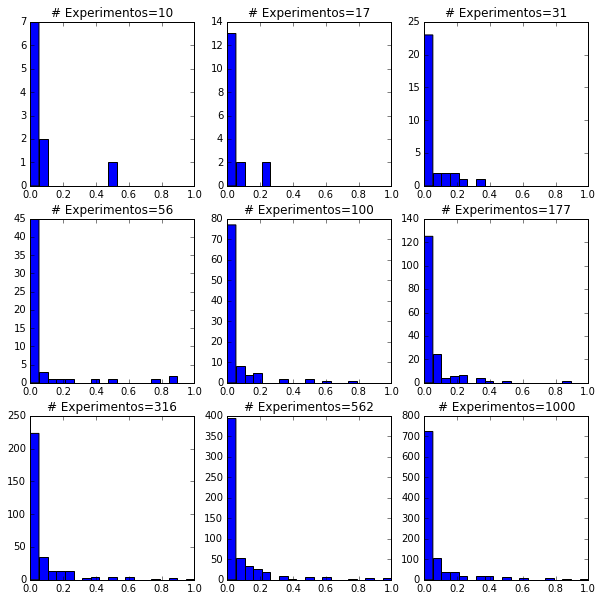

In [30]:
fig,ax=subplots(3,3,figsize=(10,10))
shortNN=logspace(1,3,9)
index=0
for i in range(3):
    for j in range(3):
        N=shortNN[index]
        pvalues=zeros(int(N))
        for K in range(int(N)):
            pvalues[K]=experimento()
        ax[i,j].hist(pvalues,linspace(0,1,20))
        ax[i,j].set_title('# Experimentos='+ str(int(N)))
        index+=1

Podemos ver el histograma de pvalues para diferentes numeros de experimentos. con el aumento de experimentos se obtiene una forma mas regular. Si bien la mayoria de los experimentos muestra resultados con un pvalue menor a 0.05, existe una cantidad no trivial de casos en que no se encuentra evidencia estadisticamente significativa de que la moneda esta cargada.

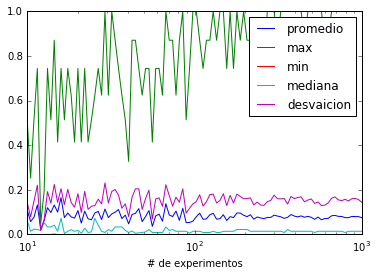

In [34]:
plot(NN,meanP,label='promedio')
plot(NN,maxP,label='max')
plot(NN,minP,label='min')
plot(NN,medianP,label='mediana')
plot(NN,stdP,label='desvaicion')

ax=gca()
xscale('log')
xlabel("# de experimentos")
legend()


Se muestran distintos datos estadisticos sobre la distribucion de p values. El valor minimo casi no es visible, porque es muy cercano a 0 y se muestra a continuacion

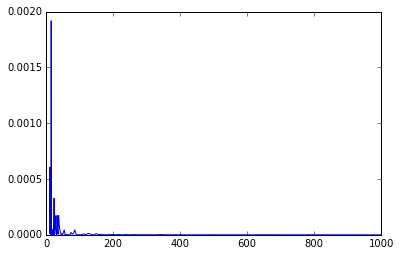

In [33]:
plot(NN,minP,label='min')